## ADY lab 6 - Hoàng Khương Duy


### Load Dataset

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [13]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [14]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [15]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [16]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

# Median value of owner-occupied homes

Median value of owner-occupied homes is about 21.000$.
Most of owner-occupied homes value goes between 18-24000$


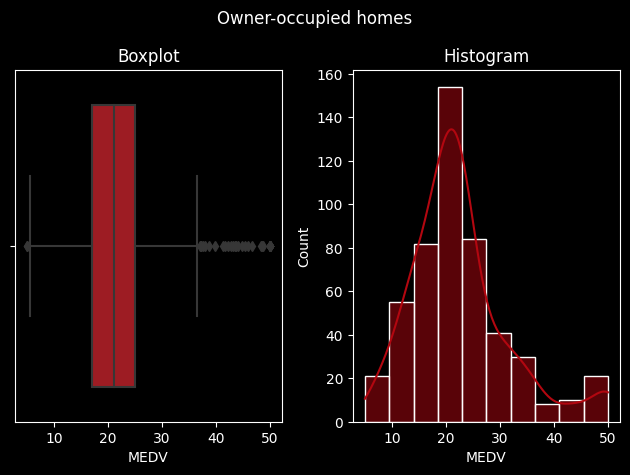

In [17]:
plt.style.use('dark_background')
fig,(ax1,ax2)=plt.subplots(1,2)

sns.boxplot(x = 'MEDV', data = boston_df,color='#b20710',ax=ax1)
ax1.set_title('Boxplot')
print("Median value of owner-occupied homes is about 21.000$.")
print("Most of owner-occupied homes value goes between 18-24000$")

sns.histplot(data=boston_df,x='MEDV',bins=10,ax=ax2,kde=True,color='#b20710')
ax2.set_title('Histogram')

fig.suptitle('Owner-occupied homes')
plt.tight_layout()
plt.show()

# Charles River variable

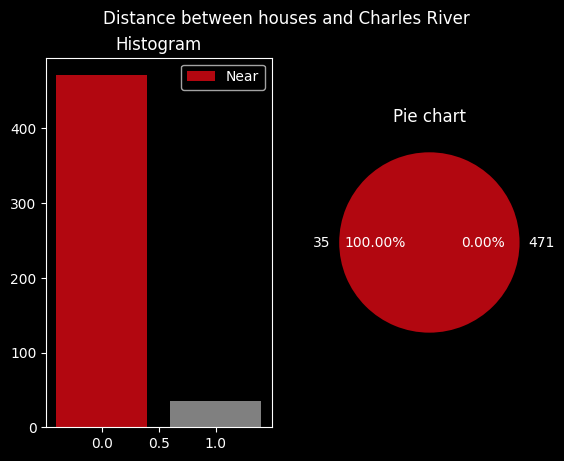

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2)
a=boston_df['CHAS'].value_counts()
#Histogram
ax1.bar(x = a.index, height = a.values,color=['#b20710','grey'])
ax1.set_title('Histogram')
ax1.legend(['Near','Far'])
#Pie chart
ax2.pie(a.index,labels=a.values,colors=['grey','#b20710'],autopct='%.2f%%')
ax2.set_title('Pie chart')

fig.suptitle('Distance between houses and Charles River')
plt.show()

The histogram shows that the majority of the houses are not near the Charles River

# Median value of owner-occupied homes per Age Group

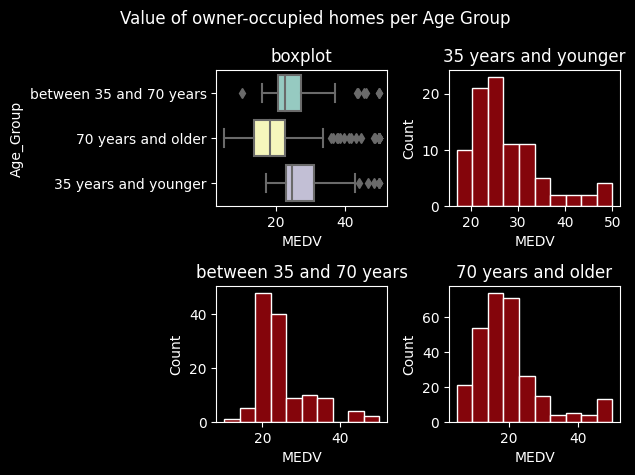

In [19]:
fig,axes=plt.subplots(2,2)

boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'
sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df,ax=axes[0,0])
axes[0,0].set_title('boxplot')

sns.histplot(data=boston_df[boston_df['Age_Group']=='35 years and younger'],x='MEDV',bins=10,color='#b20710',ax=axes[0,1])
axes[0,1].set_title('35 years and younger')
sns.histplot(data=boston_df[boston_df['Age_Group']=='between 35 and 70 years'],x='MEDV',bins=10,color='#b20710',ax=axes[1,0])
axes[1,0].set_title('between 35 and 70 years')
sns.histplot(data=boston_df[boston_df['Age_Group']=='70 years and older'],x='MEDV',bins=10,color='#b20710',ax=axes[1,1])
axes[1,1].set_title('70 years and older')

fig.suptitle('Value of owner-occupied homes per Age Group')
plt.tight_layout()
plt.show()

The boxplot above shows that on average the median value of owner occupied homes is higher when the Age is lower

## Nitric oxide concentration per proportion of non-retail business acres per town

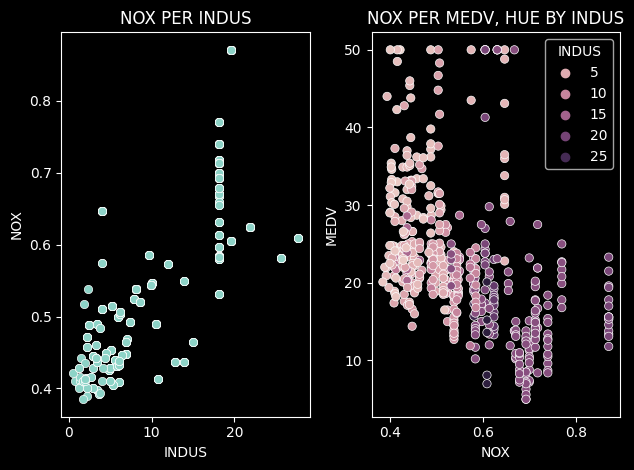

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2)
sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df,sizes=0.1,ax=ax1)
ax1.set_title('NOX PER INDUS')

sns.scatterplot(y = 'MEDV', x = 'NOX', data = boston_df,sizes=0.1,ax=ax2,hue='INDUS')
ax2.set_title('NOX PER MEDV, HUE BY INDUS')
plt.tight_layout()
plt.show()

Values in the bottom-left section of the scatter plot indicates a strong relation between low Nitric oxide concentration and low proportion of non-retail business acres per town.

Generally, a higher proprtion of non-retail business acres per town produces a higher concentration of Nitric oxide.

## Pupil to teacher ratio per town

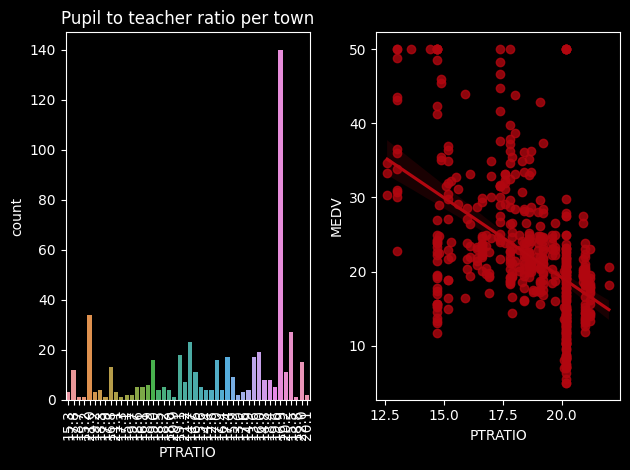

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2)
sns.countplot(x = 'PTRATIO', data = boston_df,ax=ax1)
ax1.set_title('Pupil to teacher ratio per town')
ax1.set_xticklabels(boston_df['PTRATIO'].unique(),rotation=90)

sns.regplot(y = 'MEDV', x = 'PTRATIO', data = boston_df,ax=ax2,color='#b20710')


plt.tight_layout()

plt.show()

# Is there a significant difference in median value of houses bounded by the Charles river or not?

Hypothesis:

Null Hypothesis -> There's no significant difference in median value between houses bounded and not bounded by the Charles River

Alternative Hypothesis -> There's a significant difference in median value between houses bounded and not bounded by the Charles River

In [22]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Given the p-value is less than 0.05, we reject the Null Hypothesis, meaning there is not a statistical difference in median value betwenn houses near the Charles River and houses far away

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

Hypothesis

*  Null Hypotesis: There isn't statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940
*  Alternative Hypothesis: There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940
    
   
   

In [23]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Given p-value is less than 0.05, we fail to accept the Null Hypothesis --> There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Null Hypothesis: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town

Alternative Hypothesis: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [24]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

Given the Pearson Coefficient is 0.76365 and p-value less than 0.05, we reject the Null Hypothesis as there is a positive correlation between Nitric oxide concentration and proportion of non-retail business acres per town


# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

In [25]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        07:19:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coef DIS of 1.0916 indicates that an additional weighted distance to the 5 empolyment centers in boston increases of 1.0916 the median value of owner occupied homes

#checking outliers

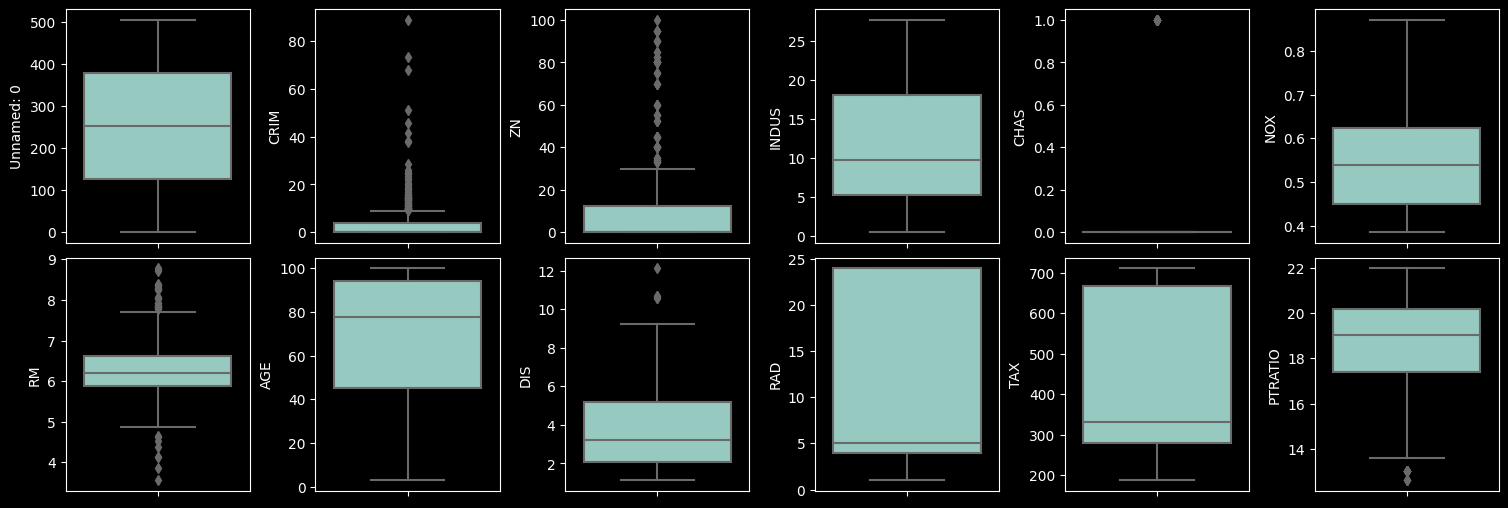

In [26]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in boston_df.columns:
  sns.boxplot(y=i, data=boston_df, ax=ax[index])
  index +=1
  if index==12: break
plt.tight_layout(pad=0.4)
plt.show()

Columns CRIM, RM, DIS, B, LSTAT and MEDV have outliers.

In [27]:
for i in boston_df.columns:
  boston_df.sort_values(by=i, ascending=True, na_position='last')
  try:
    q1, q3 = np.nanpercentile(boston_df[i].astype('int'), [25,75])
  except:
    continue
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = boston_df[i][(boston_df[i] < lower_bound) | (boston_df[i] > upper_bound)]
  perc = (outlier_data.count()/boston_df[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))
  if i == 'B':
    outlierDataB_index = outlier_data.index
    outlierDataB_LB = boston_df[i][(boston_df[i] < lower_bound)]
    outlierDataB_UB = boston_df[i][(boston_df[i] > upper_bound)]
  elif i == 'CRIM':
    outlierDataCRIM_index = outlier_data.index
    outlierDataCRIM_LB = boston_df[i][(boston_df[i] < lower_bound)]
    outlierDataCRIM_UB = boston_df[i][(boston_df[i] > upper_bound)]
  elif i == 'MEDV':
    lowerBoundMEDV = lower_bound
    upperBoundMEDV = upper_bound
  #get outliers


Outliers in Unnamed: 0 is 0.00% with count 0
Outliers in CRIM is 16.01% with count 81
Outliers in ZN is 13.44% with count 68
Outliers in INDUS is 0.00% with count 0
Outliers in CHAS is 6.92% with count 35
Outliers in NOX is 100.00% with count 506
Outliers in RM is 5.34% with count 27
Outliers in AGE is 0.00% with count 0
Outliers in DIS is 0.99% with count 5
Outliers in RAD is 0.00% with count 0
Outliers in TAX is 0.00% with count 0
Outliers in PTRATIO is 0.00% with count 0
Outliers in LSTAT is 1.98% with count 10
Outliers in MEDV is 7.31% with count 37


# CLEANING

In [28]:
dataset3=boston_df.copy()
#replacing remaning outliers by mean
for i in boston_df.columns:
  boston_df.sort_values(by=i, ascending=True, na_position='last')
  try:
    q1, q3 = np.nanpercentile(boston_df[i], [25,75])
  except:
    continue
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  mean = dataset3[i].mean()
  if i != 'MEDV':
    dataset3.loc[dataset3[i] < lower_bound, [i]] = mean
    dataset3.loc[dataset3[i] > upper_bound, [i]] = mean
  else:
    dataset3.loc[dataset3[i] < lower_bound, [i]] = mean
    dataset3.loc[dataset3[i] > upper_bound, [i]] = 50
dataset3.describe()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,1.513365,4.290963,11.136779,0.004784,0.554695,6.236261,68.574901,3.724404,9.549407,408.237154,18.619630,12.344884,22.925228
std,146.213884,2.144763,7.792239,6.860353,0.017569,0.115878,0.517629,28.148861,1.979785,8.707259,168.537116,1.936255,6.631300,9.898258
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,4.880000,2.900000,1.129600,1.000000,187.000000,13.600000,1.730000,5.600000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.899750,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.100000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.224500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.613524,11.363636,18.100000,0.000000,0.624000,6.515250,94.075000,5.112625,24.000000,666.000000,20.200000,16.462500,25.000000
max,505.000000,8.982960,30.000000,27.740000,0.069170,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,22.000000,30.810000,50.000000


In [75]:
#independent variable(X) and dependent variable(Y)
X = dataset3.iloc[:, :-2]
Y = dataset3['MEDV']
X.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT'],
      dtype='object')

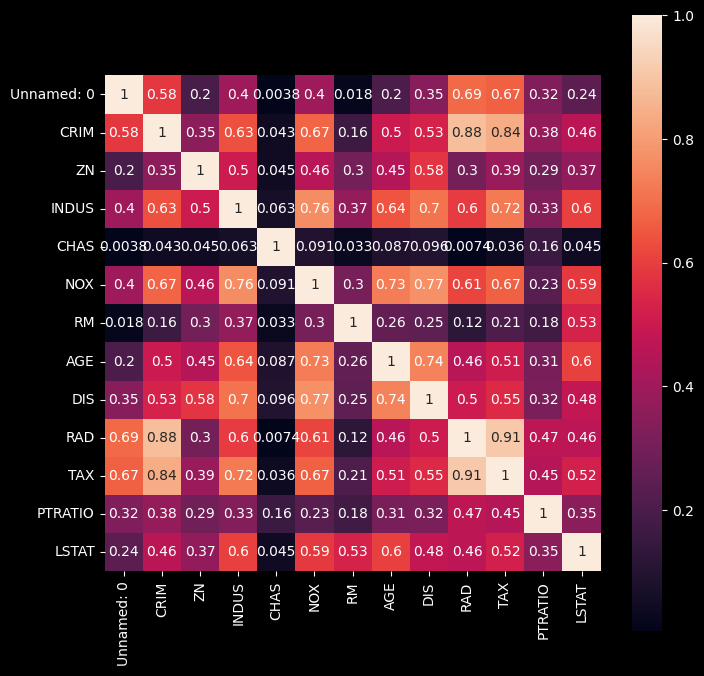

In [76]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(method='pearson').abs(), annot=True, square=True)
plt.show()

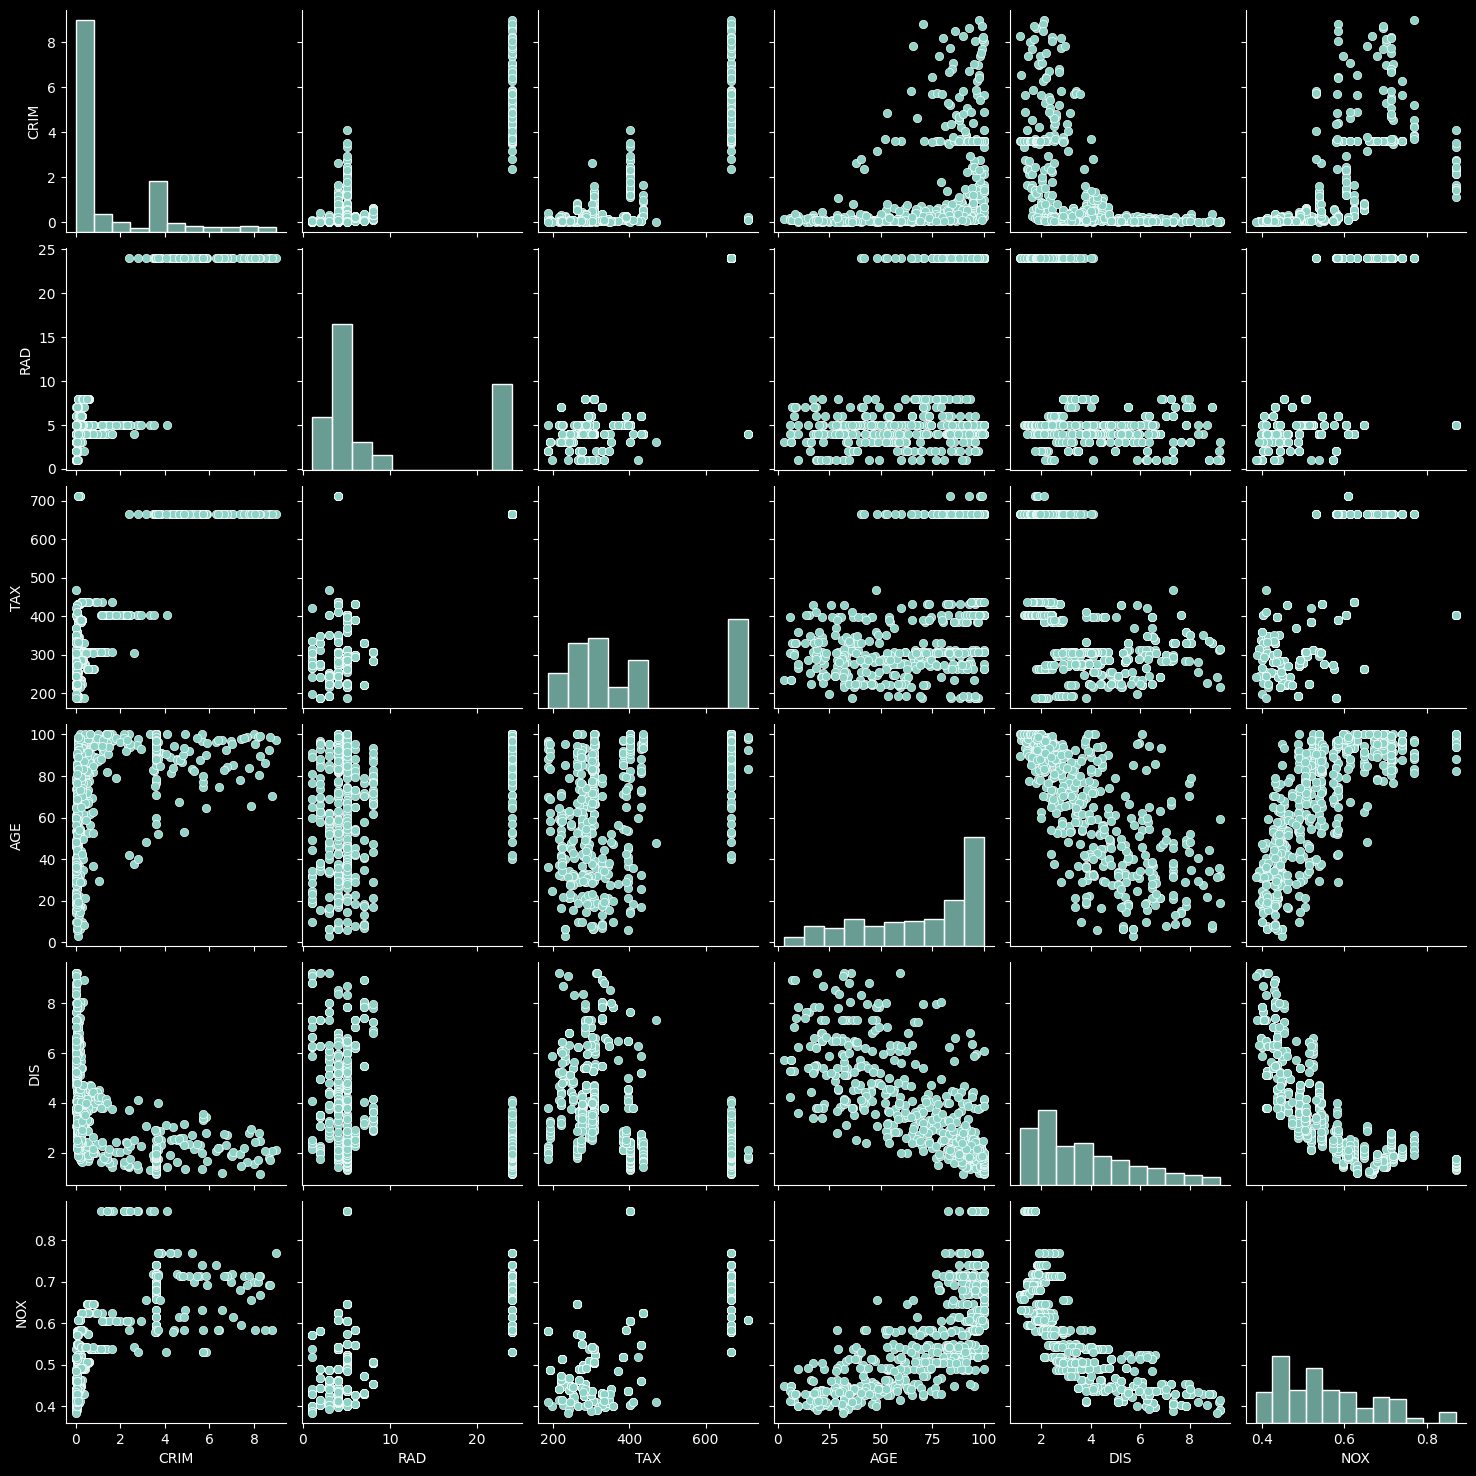

In [32]:
sns.pairplot(X[['CRIM','RAD','TAX','AGE','DIS','NOX']])

Nhận xét tương tác giữa 5 biến có tương tác corr cao là CRIM,RAD,TAX,AGE,DIS.
* CRIM - per capita crime rate by town

· AGE - proportion of owner-occupied units built prior to 1940

· DIS - weighted distances to five Boston employment centres

· RAD - index of accessibility to radial highways

· TAX - full-value property-tax rate per $10,000
· NOX - nitric oxides concentration (parts per 10 million)
*   CRIM: Càng gân trung tâm càng nhiều tội phạm, tập trung ở nơi có trung bình độ tuổi cao, phân bố ở khu vực thuế >450 và >650
*   DIS: dân số trung bình ở trung tâm đa phần trẻ tuổi, càng xa càng già, tương tự với thuế. Đối với RAD thì phân bố rõ rệt thành 2 phần <450 và >650. Ngoài ra gần trung tâm thì mật độ NO cũng tăng
*   AGE: Phân bố đồng đều theo từng độ tuổi nhưng chia thành 2 mức thuế riêng biệt từ 0-450 và >650
*   TAX: phân bố thành 2 mức thuế <450 và >650





Checking correlation of remaning independent variables with MEDV using Pearson correlation method

In [77]:
from scipy.stats import pearsonr
for i in X.columns:
  corr, _ = pearsonr(X[i], Y)
  print(i,corr)

Unnamed: 0 -0.21323663524476366
CRIM -0.3434511663274019
ZN 0.2981643152208556
INDUS -0.4727689243466756
CHAS 0.1551779511710557
NOX -0.4092824714548359
RM 0.5042423614233955
AGE -0.35427973952442227
DIS 0.24415080477046686
RAD -0.3615321701025264
TAX -0.449897455647836
PTRATIO -0.4224623964893394
LSTAT -0.712314353792971


In [78]:
X.drop('Unnamed: 0',axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48


# PREDICT MODELS

In [79]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score as cvs
from sklearn.metrics               import classification_report, accuracy_score

In [80]:
#spliting data into traning set and test set
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.2, random_state=0)

In [86]:
#LINEAR REGRESSION
linear = lr()
linear.fit(X_train, Y_train)
Y_pred = linear.predict(X_test)
Y_compare_linear = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print()
accuracy=pd.DataFrame({'Linear Regression':linear.score(X_test,Y_test)},index=['Accuracy'])

Y_compare_linear.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
329,22.6,26.987307
371,50.0,24.522869
219,23.0,30.739915
403,8.3,12.545139
78,21.2,20.501309


In [88]:
#Support vector regression model
svr = SVR(kernel= 'poly', gamma='scale')
svr.fit(X_train,Y_train)
Y_pred = svr.predict(X_test)
accuracy['Support vector regression']=svr.score(X_test,Y_test)
Y_compare_svr = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_svr.head()

,Actual,Predicted
329,22.6,23.535059
371,50.0,13.315885
219,23.0,22.951367
403,8.3,13.694081
78,21.2,20.955852


In [89]:
#Decission tree regression model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
accuracy['Decission tree regression']=rf.score(X_test,Y_test)
Y_compare_randomforrest = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_randomforrest.head()

,Actual,Predicted
329,22.6,25.314000
371,50.0,19.694000
219,23.0,22.669000
403,8.3,11.978984
78,21.2,21.081000


In [90]:
#K-Nearest Neighbour regression model
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
accuracy['K-Nearest Neighbour regression']=knn.score(X_test,Y_test)
Y_compare_knn = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_knn.head()

,Actual,Predicted
329,22.6,22.038462
371,50.0,24.130769
219,23.0,26.715385
403,8.3,14.166586
78,21.2,21.115385


In [91]:
accuracy.T

,Accuracy
Linear Regression,0.453971
Support vector regression,0.035426
Decission tree regression,0.600272
K-Nearest Neighbour regression,0.345337
